<a href="https://colab.research.google.com/github/Cierum/CoronaVirusTX/blob/main/CoronaVirus_in_TX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Description



*   Coronavirus is non-discriminatory, in the sense that it can spread from one city to any other city. The only goal of the virus is to spread to all cities in Texas. Find a possible way for the virus to spread (Uninformed Search).
*   To counter the effect of the virus, vaccine needs to be distributed to all cities. One city has more demand than supply, whereas one city has a shortage of vaccines. The goal is to find an **optimal** strategy to transport the vaccine (Informed Search) from the city with high supply (low demand) to the city with low supply (high demand).




#Reading Data Files & Creating a 2D Graph



*   **cities.csv** - This file contains a list of coordinates for selected cities in Texas, in the following format:
```
San Antonio,29.4685,-98.5254
```


*   **distances.csv** - This file contains straight-line distance values between two cities of Texas, if a path exists, in the following format:
```
San Antonio,New Braunfels,30.80876734
```






In [1]:


from google.colab import drive
drive.mount('/content/drive')

import re
import os
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd


Mounted at /content/drive


In [2]:
# Assume that the data files are in the following folder -- THIS WILL BE USED BY THE TA
basePath = "/content/drive/My Drive/Colab Notebooks/Artificial Intelligence/Data/"


In [3]:
# Load the graph data from the files
city=os.path.join(basePath,"cities.csv")
distance=os.path.join(basePath,"distances.csv")
cities = open(city,'r')
city = cities.readlines()
distances = open(distance,'r')
distance = distances.readlines()
print(city)
print(distance)

['Abilene,32.4543,-99.7384\n', 'Alice,27.7556,-98.0653\n', 'Amarillo,35.1989,-101.831\n', 'Austin,30.3006,-97.7517\n', 'Beaumont,30.085,-94.1451\n', 'Brownsville,25.998,-97.4565\n', 'College Station,30.5852,-96.296\n', 'Columbus,29.7055,-96.5563\n', 'Corpus Christi,27.7261,-97.3755\n', 'Dalhart,36.0579,-102.5123\n', 'Dallas,32.7936,-96.7662\n', 'Del Rio,29.3708,-100.88\n', 'El Paso,31.8479,-106.4309\n', 'Fort Worth,32.7812,-97.3472\n', 'Galveston,29.5112,-95.1979\n', 'Gonzalez,29.5126,-97.4472\n', 'Houston,29.7869,-95.3905\n', 'Jamaica Beach,29.1905,-94.9801\n', 'Kenedy,28.8176,-97.8518\n', 'Laredo,27.5617,-99.4874\n', 'Lubbock,33.5642,-101.8871\n', 'McAllen,26.2273,-98.2471\n', 'Midland,32.0249,-102.1137\n', 'New Braunfels,29.6997,-98.1148\n', 'Odessa,31.8831,-102.3406\n', 'Palestine,31.7544,-95.6471\n', 'Round Rock,30.5254,-97.6659\n', 'San Angelo,31.4426,-100.4501\n', 'San Antonio,29.4658,-98.5254\n', 'San Marcos,29.8736,-97.938\n', 'Seguin,29.5891,-97.9661\n', 'Sugar Land,29.5935,-

In [4]:
#split coordinates of cities
def splitCities (raw_clue):
    list1 = list ()
    list2 = list ()
    list3 = list ()
    for i in range(len(raw_clue)):
        temp = raw_clue[i].split (',')
        list1.append (temp[0])
        list2.append (float(temp[1]))
        list3.append (float(temp[2]))
    return (list1, list2, list3) 

# split distances data into , city_name, loc_x, loc_y
def splitDistances (raw_clue):
    list1 = list ()
    list2 = list ()
    list3 = list ()
    for i in range (len (raw_clue)):
        temp = raw_clue[i].split (',')
        list1.append (temp[0])
        list2.append (temp[1])
        list3.append (float(temp[2]))
    return (list1, list2, list3) 


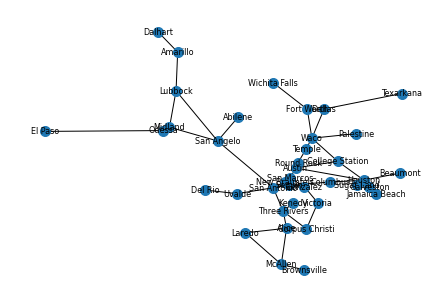

In [5]:
#Drawing 2D graph using networkx
(city_name, city_x, city_y) = splitCities(city)
map_info = { 'city': city_name, 'latitude': city_x, 'longitude': city_y}
map_info = pd.DataFrame(map_info)

(loc_x,loc_y, distance) = splitDistances(distance)
dis_info = { 'from' : loc_x, 'to' : loc_y, 'dist' : distance}
dis_info = pd.DataFrame(dis_info)

G = nx.Graph()
for i in map_info.index:
  G.add_node(map_info.loc[i, 'city'], pos = (map_info.loc[i, 'longitude'],map_info.loc[i, 'latitude']))

for i in dis_info.index:
  G.add_edge(dis_info.loc[i, 'from'], dis_info.loc[i, 'to'], length = dis_info.loc[i, 'dist'])

nx.draw(G, nx.get_node_attributes(G, 'pos'), with_labels=True, node_size=100, font_size=8)

In [6]:
# Display a 2D graph of the given data.
import folium
latitude = map_info['latitude'].mean()
longitude = map_info['longitude'].mean()

#display a graph on the map
map = folium.Map([latitude,longitude],zoom_start=7)
for i in map_info.index:
  sub_lat = map_info.loc[i, 'latitude']
  sub_long = map_info.loc[i, 'longitude']
  title = map_info.loc[i, 'city']
  folium.Marker([sub_lat,sub_long],tooltip = title).add_to(map)

lists = []
for n in map_info.index:
    points = (map_info.loc[n, 'latitude'], map_info.loc[n, 'longitude'])
    lists.append(points)  
    folium.PolyLine(lists, color='red', weight=.5, opacity=0.1).add_to(map)
map

#Virus Spread - Uninformed Search Agent



In [7]:
# Implement ANY uninformed search strategy for the spread of coronavirus from the starting city of 'Three Rivers'
dist_list = []
def BFS_Node(graph, node, dist,visited=[]):
    queue = [node]
    visited.append(node)
    while len(queue) > 0:
        dequeued = queue.pop(0)
        for neighbor,i in graph[dequeued].items():
            if neighbor not in visited:
                visited.append(neighbor)
                queue.append(neighbor)    
                dist_list.append(i)


    return visited,dist_list
path = BFS_Node(G, 'Three Rivers', dist_list)
for i in range(len(path[0])):
  print(i+1, path[0][i])

trav = 0

for i in range(len(dist_list)):
  dist_list[i] = list(dist_list[i].values())
  trav += float(dist_list[i][0])

print()
print("Distance Travelled : " + "%.2f miles"  %trav)

1 Three Rivers
2 San Antonio
3 Corpus Christi
4 Alice
5 Kenedy
6 San Angelo
7 New Braunfels
8 Seguin
9 Uvalde
10 Victoria
11 Laredo
12 McAllen
13 Midland
14 Lubbock
15 Abilene
16 San Marcos
17 Gonzalez
18 Columbus
19 Del Rio
20 Brownsville
21 Odessa
22 Amarillo
23 Austin
24 Houston
25 El Paso
26 Dalhart
27 Round Rock
28 College Station
29 Beaumont
30 Galveston
31 Sugar Land
32 Temple
33 Waco
34 Jamaica Beach
35 Palestine
36 Fort Worth
37 Dallas
38 Wichita Falls
39 Texarkana

Distance Travelled : 3354.32 miles


#Vaccine Transportation - Informed Search Agent

 create an informed search agent that will be used to transport the vaccine. From **San Antonio** to **College Station**, where there is a shortage of vaccines.



In [8]:
# Implement an OPTIMAL informed search strategy for distributing the vaccine from 'Corpus Chriti' to 'Amarillo'
!pip install haversine
from haversine import haversine



In [9]:
def cord(city):
  coordinate = map_info.loc[map_info['city'] == city]
  coordinate = coordinate.values.tolist()
  coordinate = coordinate[0][1:]
  return coordinate


In [10]:
def move(city1, city2):
  distance = dis_info.loc[dis_info['from'] == city1] 
  dist = distance.loc[distance['to'] == city2]
  dist = dist.values.tolist()
  dist = dist[0][2]
  return dist

In [11]:

begin = cord('San Antonio')
end = cord('College Station')

def aStar(graph, start, goal, visited=[]):
    openList = []
    heu = []
    dist = 0
    closedList = []
    queue = [start]
    goal = [goal]
    visited.append(start)
    closedList.append(start)

    while (queue != goal):
        gn = 0
        fn = 0
        hn = 0
        dequeued = queue.pop(0)

        gn = haversine(begin, cord(dequeued))
        hn = haversine(end, cord(dequeued))
        fn = gn+hn

        for neighbor in graph[dequeued]:
          if (neighbor not in visited and neighbor not in openList):
            openList.append(neighbor)

        for i in range(len(openList)):
          fns = haversine(cord(openList[i]), end) + haversine(cord(openList[i]), cord(dequeued))
          heu.append(fns)
        
        num = heu.index(min(heu))
        heu = []
        queue.append(openList[num])
        visited.append(openList[num])
        closedList.append(openList[num])
        openList.remove(openList[num])


    return closedList
sequence = aStar(G, 'San Antonio', 'College Station')

total_distance = 0



for i in range(len(sequence)):
  print(i+1,sequence[i])




for i in dis_info.index:
  for x in range(len(sequence)-1):
    for y in range(1 ,len(sequence)):
      if (sequence[x] == dis_info.loc[i, 'from'] and sequence[y] == dis_info.loc[i, 'to']): 
        total_distance += dis_info.loc[i, 'dist']
   
print()
print(str(total_distance)+' miles')



1 San Antonio
2 New Braunfels
3 San Marcos
4 Austin
5 College Station

186.77450141 miles
